In [1]:
import os, sys, shutil
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import numpy as np
from math import ceil

from sys import exc_info
import numpy as np
import torch
import math
from matplotlib.colors import LinearSegmentedColormap

In [5]:
RESULTS_DIR = {
    'FT': '../result_simsiam_p2/cifar100_noTrans_simsiam_simsiam-06202021_224213_685119/',
    'P2': '../result_simsiam_p2/cifar100_noTrans_simsiam_simsiam-06202021_223610_624095/',
    'P2_Lin': '../result_simsiam_p2_2/cifar100_noTrans_simsiam_simsiam_linear-06302021_182737_816848',
    'P2_2048': '../result_simsiam_p2_2/cifar100_noTrans_simsiam_simsiam_p2_2048-06302021_185144_824454',
}

In [12]:
RESULTS = {}
for n, d in RESULTS_DIR.items():
    _df = pd.read_csv(f"{d}/results/fresh_head_acc_taw.txt", sep='\t', header=None)
    _df.index = _df.index + 1
    _df.columns = _df.columns + 1
    RESULTS[n] = _df

In [13]:
for n, acc_taw in RESULTS.items():
    display(f'Experiment: {n}')
    display(acc_taw)

'Experiment: FT'

,1,2,3,4,5,6,7,8,9,10
1,0.783,0.629,0.500,0.426,0.572,0.449,0.718,0.568,0.619,0.628
2,0.649,0.862,0.514,0.481,0.561,0.450,0.687,0.576,0.543,0.667
3,0.654,0.700,0.847,0.488,0.600,0.494,0.665,0.606,0.607,0.664
4,0.650,0.692,0.646,0.718,0.608,0.494,0.693,0.596,0.588,0.681
5,0.684,0.692,0.643,0.553,0.783,0.505,0.678,0.562,0.598,0.677
6,0.663,0.696,0.637,0.550,0.650,0.701,0.713,0.576,0.619,0.700
7,0.698,0.705,0.585,0.470,0.572,0.486,0.861,0.583,0.622,0.689
8,0.666,0.680,0.588,0.503,0.546,0.478,0.695,0.763,0.606,0.628
9,0.668,0.657,0.610,0.484,0.564,0.511,0.692,0.605,0.803,0.635
10,0.653,0.679,0.531,0.454,0.547,0.451,0.647,0.565,0.563,0.857


'Experiment: P2'

,1,2,3,4,5,6,7,8,9,10
1,0.783,0.629,0.500,0.426,0.572,0.449,0.718,0.568,0.619,0.628
2,0.791,0.841,0.533,0.479,0.599,0.491,0.751,0.650,0.632,0.702
3,0.791,0.820,0.779,0.524,0.652,0.520,0.761,0.649,0.667,0.730
4,0.784,0.820,0.756,0.646,0.661,0.549,0.770,0.656,0.673,0.740
5,0.776,0.805,0.734,0.629,0.745,0.557,0.775,0.662,0.653,0.749
6,0.778,0.805,0.730,0.610,0.733,0.624,0.800,0.664,0.671,0.775
7,0.774,0.781,0.712,0.594,0.707,0.601,0.834,0.669,0.694,0.761
8,0.768,0.792,0.709,0.602,0.695,0.600,0.819,0.710,0.686,0.760
9,0.767,0.780,0.712,0.604,0.704,0.589,0.793,0.684,0.725,0.762
10,0.773,0.766,0.715,0.609,0.688,0.587,0.796,0.662,0.706,0.802


'Experiment: P2_Lin'

,1,2,3,4,5,6,7,8,9,10
1,0.783,0.629,0.500,0.426,0.572,0.449,0.718,0.568,0.619,0.628
2,0.779,0.764,0.507,0.462,0.604,0.471,0.735,0.602,0.631,0.686
3,0.785,0.789,0.695,0.499,0.634,0.505,0.745,0.630,0.657,0.703
4,0.769,0.784,0.726,0.572,0.655,0.517,0.752,0.641,0.655,0.729
5,0.780,0.785,0.724,0.589,0.704,0.541,0.768,0.650,0.652,0.739
6,0.778,0.787,0.733,0.596,0.702,0.582,0.785,0.660,0.653,0.754
7,0.790,0.799,0.736,0.591,0.709,0.578,0.808,0.663,0.673,0.746
8,0.780,0.795,0.723,0.603,0.712,0.581,0.791,0.695,0.675,0.767
9,0.787,0.799,0.732,0.605,0.705,0.590,0.800,0.685,0.706,0.768
10,0.780,0.796,0.739,0.604,0.695,0.575,0.798,0.684,0.692,0.780


'Experiment: P2_2048'

,1,2,3,4,5,6,7,8,9,10
1,0.783,0.629,0.500,0.426,0.572,0.449,0.718,0.568,0.619,0.628
2,0.793,0.784,0.529,0.476,0.616,0.478,0.736,0.622,0.639,0.688
3,0.785,0.798,0.725,0.522,0.635,0.517,0.763,0.649,0.651,0.712
4,0.779,0.808,0.754,0.596,0.676,0.549,0.776,0.665,0.677,0.746
5,0.785,0.797,0.745,0.615,0.721,0.564,0.782,0.658,0.682,0.756
6,0.788,0.793,0.747,0.637,0.723,0.606,0.797,0.674,0.697,0.768
7,0.792,0.805,0.746,0.623,0.729,0.612,0.821,0.668,0.698,0.782
8,0.788,0.800,0.756,0.636,0.732,0.621,0.820,0.688,0.713,0.781
9,0.792,0.807,0.743,0.621,0.724,0.617,0.818,0.711,0.724,0.781
10,0.797,0.799,0.750,0.621,0.721,0.604,0.810,0.696,0.715,0.805


In [14]:
def plot_diff_acc(name1, name2):
    fig, ax = plt.subplots(figsize=(8,7))
    cmap = LinearSegmentedColormap.from_list('RedGreen', ['crimson', 'lime'])
    sns.heatmap((RESULTS[name1] - RESULTS[name2]), cmap=cmap, annot=True, fmt="0.2f", linewidths=.5, square=True)
    plt.xlabel('Eval task')
    plt.ylabel('Trained Task')
    plt.title(f'Difference of {name1} vs {name2} ({name1} - {name2})')

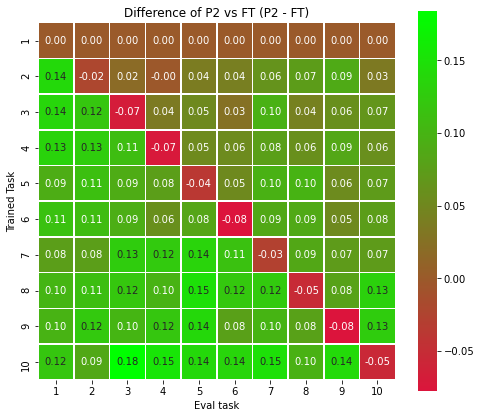

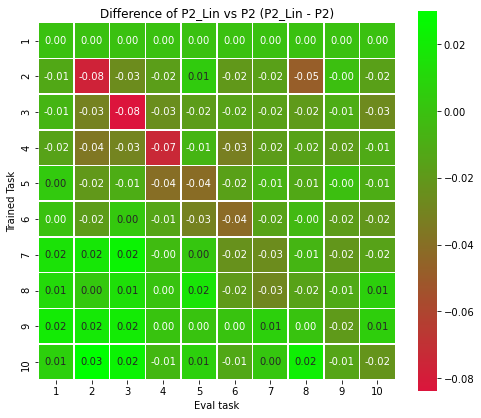

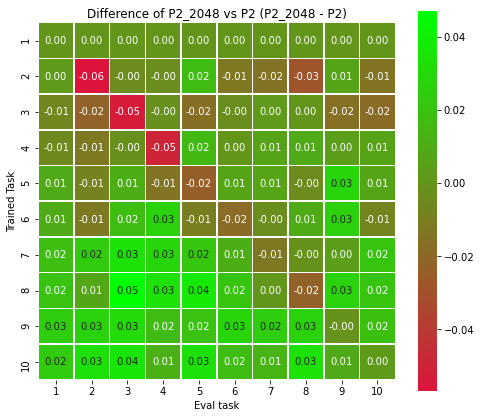

In [26]:
plot_diff_acc('P2', 'FT')
plot_diff_acc( 'P2_Lin', 'P2')
plot_diff_acc('P2_2048', 'P2')

In [19]:
import glob

In [20]:
GPU=2

In [33]:
def read_tensors(f_prefix, device=f'cuda:{GPU}'):
    newest_file = sorted(glob.glob(f'{f_prefix}-*'))[-1]
    return torch.load(newest_file, map_location=torch.device(device))

In [22]:
def read_all_tensors(_dir):
    _tensors = []
    for t in range(10):
        a = []
        for et in range(10):
            a.append(read_tensors(f'{_dir}/eval-task_{t}-eval_task_{et}'))
        _tensors.append(a)
    return _tensors

In [24]:
TENSORS = {n:read_all_tensors(_dir) for n, _dir in RESULTS_DIR.items()}

In [71]:
!gpustat

cudahpc15            Tue Jun 22 19:47:21 2021  440.33.01
[0] Quadro RTX 6000  | 27'C,   0 % |    11 / 24220 MB |
[1] Quadro RTX 6000  | 29'C,   0 % |    11 / 24220 MB |
[2] Quadro RTX 6000  | 31'C,   0 % |  5906 / 24220 MB | btwardowski(5895M)
[3] Quadro RTX 6000  | 30'C,   0 % |    11 / 24220 MB |
[4] Quadro RTX 6000  | 29'C,   0 % |    11 / 24220 MB |
[5] Quadro RTX 6000  | 63'C,  88 % |  2340 / 24220 MB | btwardowski(2329M)
[6] Quadro RTX 6000  | 74'C,  97 % | 10271 / 24220 MB | voyazici(9395M) btwardowski(865M)
[7] Quadro RTX 6000  | 70'C,  97 % |  9358 / 24220 MB | voyazici(9347M)
[8] Quadro RTX 6000  | 75'C,  97 % |  9150 / 24220 MB | voyazici(9139M)
[9] Quadro RTX 6000  | 69'C,  97 % |  9144 / 24220 MB | voyazici(9133M)


In [25]:
class CudaCKA(object):
    def __init__(self, device):
        self.device = device
    
    def centering(self, K):
        n = K.shape[0]
        unit = torch.ones([n, n], device=self.device)
        I = torch.eye(n, device=self.device)
        H = I - unit / n
        return torch.matmul(torch.matmul(H, K), H)  

    def rbf(self, X, sigma=None):
        GX = torch.matmul(X, X.T)
        KX = torch.diag(GX) - GX + (torch.diag(GX) - GX).T
        if sigma is None:
            mdist = torch.median(KX[KX != 0])
            sigma = math.sqrt(mdist)
        KX *= - 0.5 / (sigma * sigma)
        KX = torch.exp(KX)
        return KX

    def kernel_HSIC(self, X, Y, sigma):
        return torch.sum(self.centering(self.rbf(X, sigma)) * self.centering(self.rbf(Y, sigma)))

    def linear_HSIC(self, X, Y):
        L_X = torch.matmul(X, X.T)
        L_Y = torch.matmul(Y, Y.T)
        return torch.sum(self.centering(L_X) * self.centering(L_Y))

    def linear_CKA(self, X, Y):
        hsic = self.linear_HSIC(X, Y)
        var1 = torch.sqrt(self.linear_HSIC(X, X))
        var2 = torch.sqrt(self.linear_HSIC(Y, Y))

        return hsic / (var1 * var2)

    def kernel_CKA(self, X, Y, sigma=None):
        hsic = self.kernel_HSIC(X, Y, sigma)
        var1 = torch.sqrt(self.kernel_HSIC(X, X, sigma))
        var2 = torch.sqrt(self.kernel_HSIC(Y, Y, sigma))
        return hsic / (var1 * var2)

In [114]:
cka = CudaCKA(f'cuda:{GPU}')

## CKA across tasks

In [99]:
cka_result = {}
for rep_n, rep in [('f', 0), ('z', 1), ('p2', 2)]:
    print('rep:', rep_n)
    _cka = {}
    for n, tensors in [('FT', ft_tensors), ('P2', p2_tensors)]:
        print('method:', n)
        m = torch.zeros((10, 10))
        for t in range(10):
            for et in range(t, 10):
                if (tensors[t][t][rep] is None) or (tensors[et][t][rep] is None) or (tensors[t][t][rep] == []) or (tensors[et][t][rep] == []):
                    continue
                m[et, t] = cka.kernel_CKA(tensors[t][t][rep], tensors[et][t][rep])
        _cka[n] = m.cpu().numpy()

    cka_result[rep_n] = _cka

rep: f
method: FT
method: P2
rep: z
method: FT
method: P2
rep: p2
method: FT
method: P2


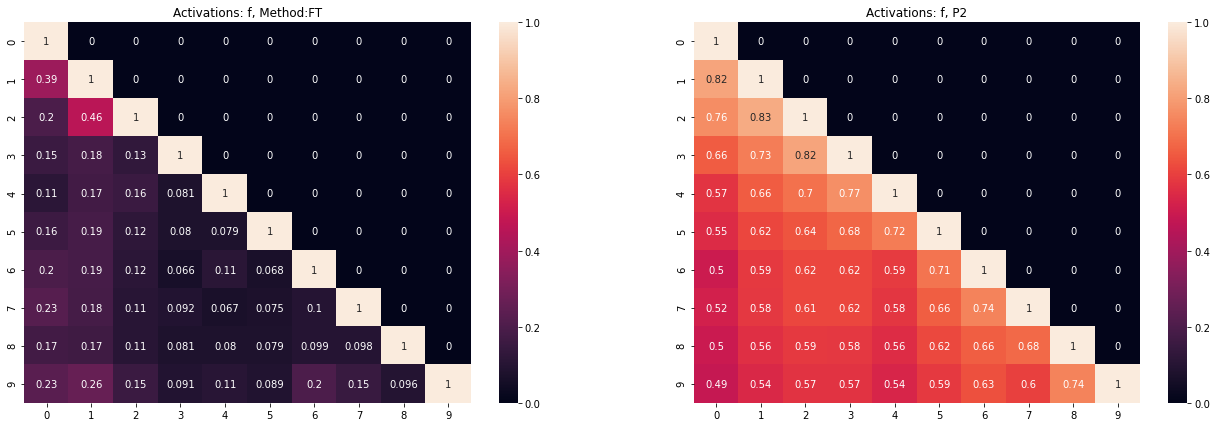

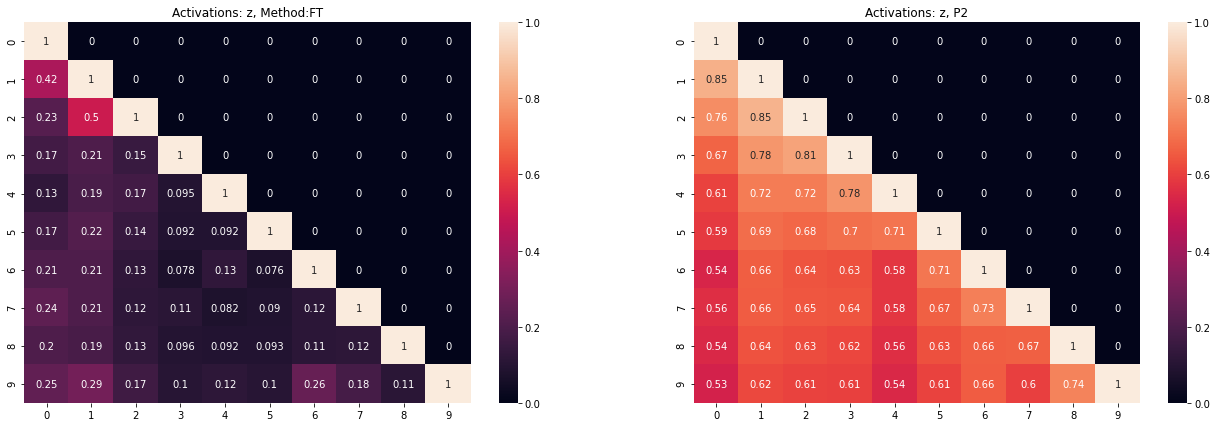

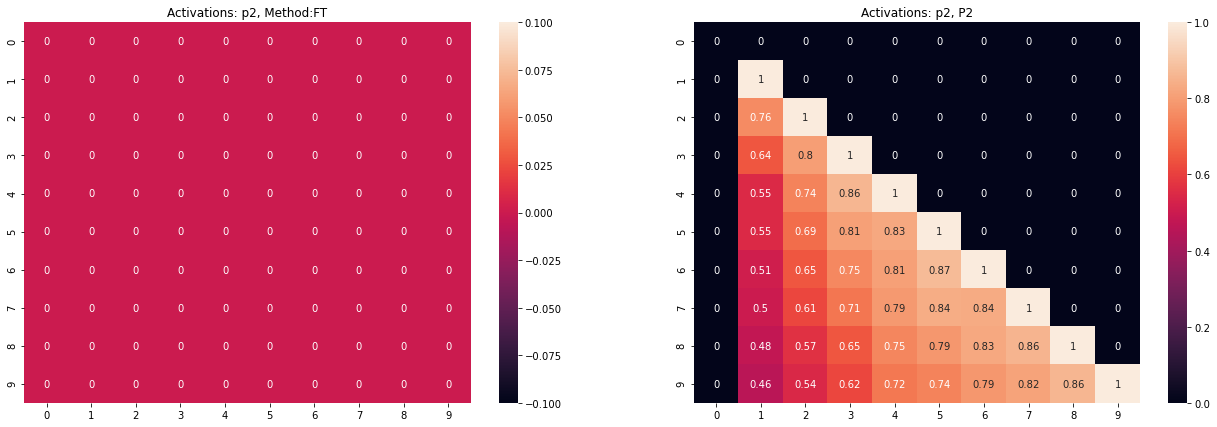

In [109]:
for rep_n, _cka in cka_result.items():
    fig, ax = plt.subplots(ncols=2, figsize=(2* 11, 7))
    # plot FT
    sns.heatmap(_cka['FT'], annot=True, ax=ax[0])
    ax[0].title.set_text(f'Activations: {rep_n}, Method:FT')
    sns.heatmap(_cka['P2'], annot=True, ax=ax[1])
    ax[1].title.set_text(f'Activations: {rep_n}, P2')
    

In [115]:
cka_result = {}
for rep_n, rep in [('f', 0), ('z', 1), ('p2', 2)]:
    print('rep:', rep_n)
    _cka = {}
    for n, tensors in [('FT', ft_tensors), ('P2', p2_tensors)]:
        print('method:', n)
        m = torch.zeros((10, 10))
        prev_t = 0
        for t in range(10):
            prev_t = t
            for et in range(t, 10):
                
                if (tensors[t][t][rep] is None) or (tensors[et][t][rep] is None) or (tensors[t][t][rep] == []) or (tensors[et][t][rep] == []):
                    continue
                m[et, t] = cka.kernel_CKA(tensors[prev_t][t][rep], tensors[et][t][rep])
                prev_t = et
                
        _cka[n] = m.cpu().numpy()

    cka_result[rep_n] = _cka

rep: f
method: FT
method: P2
rep: z
method: FT
method: P2
rep: p2
method: FT
method: P2


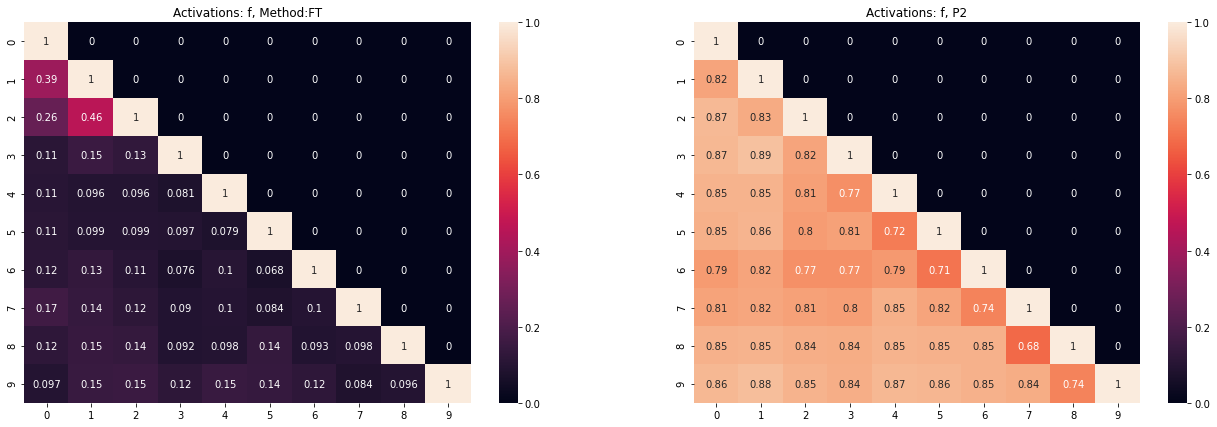

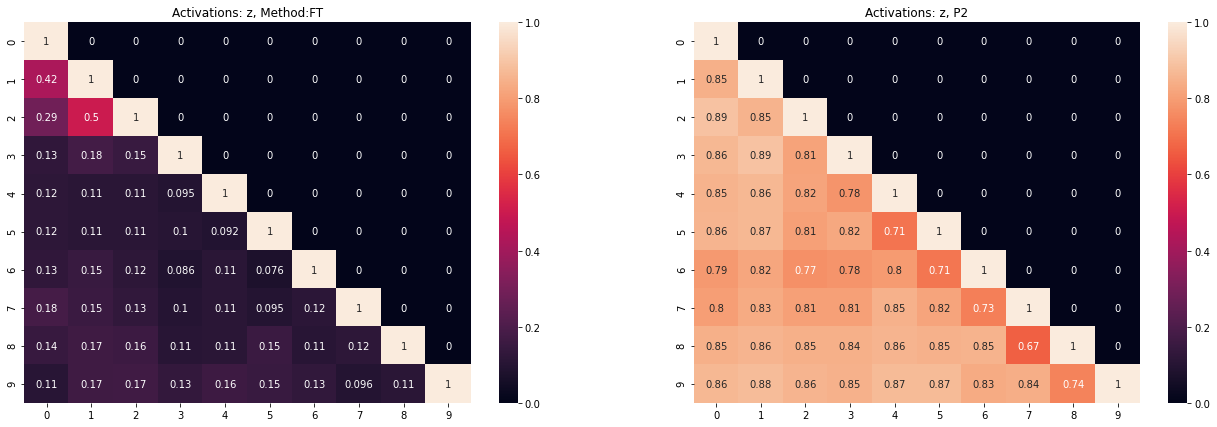

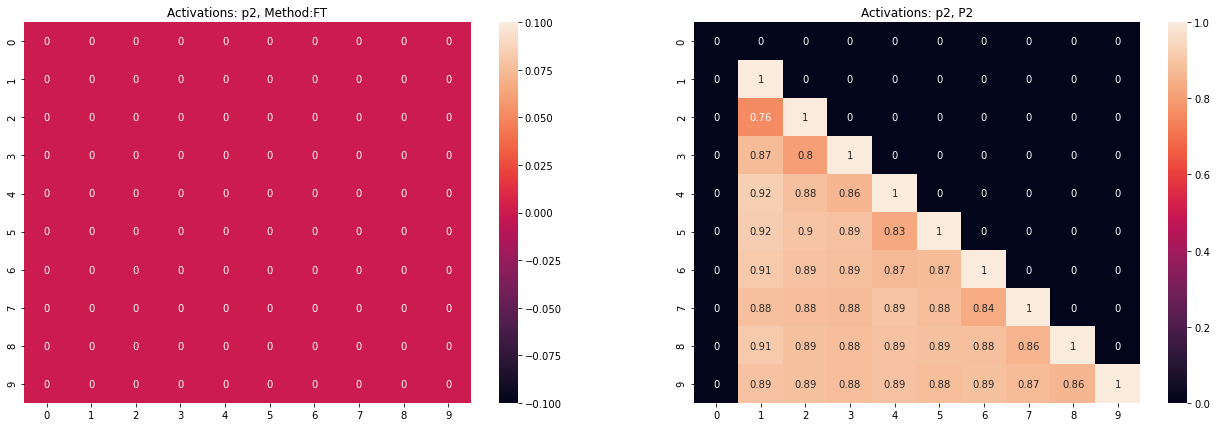

In [116]:
for rep_n, _cka in cka_result.items():
    fig, ax = plt.subplots(ncols=2, figsize=(2* 11, 7))
    # plot FT
    sns.heatmap(_cka['FT'], annot=True, ax=ax[0])
    ax[0].title.set_text(f'Activations: {rep_n}, Method:FT')
    sns.heatmap(_cka['P2'], annot=True, ax=ax[1])
    ax[1].title.set_text(f'Activations: {rep_n}, P2')

# Read a model and check P2 head

In [30]:
model_dir = RESULTS_DIR['P2_Lin']

In [34]:
models = read_tensors(f"{model_dir}/model-task_0", 'cpu')

In [39]:
p2_over_tasks = [read_tensors(f"{model_dir}/model-task_{t}", 'cpu')['p2']['weight'] for t in range(1, 10)]

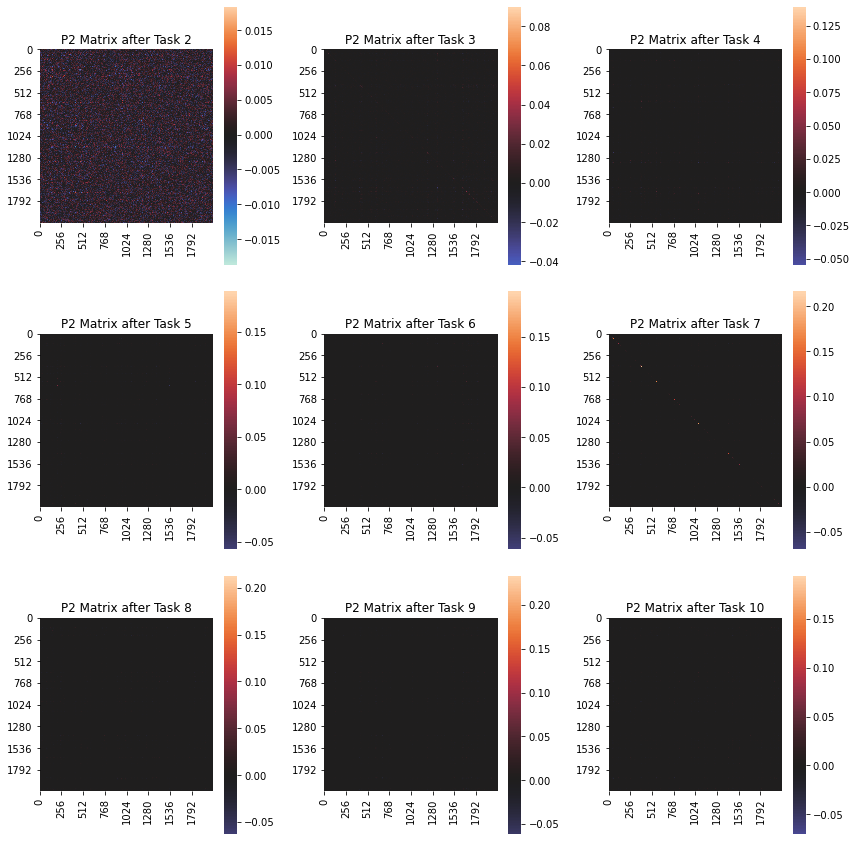

In [92]:
plt.figure(figsize=(12, 12))
for t, m in enumerate(p2_over_tasks):
    plt.subplot(3,3, t+1)
    t = t + 2
    sns.heatmap(m.numpy(), square=True, #robust=True, 
                center=0.0, xticklabels=256, yticklabels=256)
    plt.title(f'P2 Matrix after Task {t}')
    

plt.tight_layout()

In [69]:
from numpy import linalg as LA

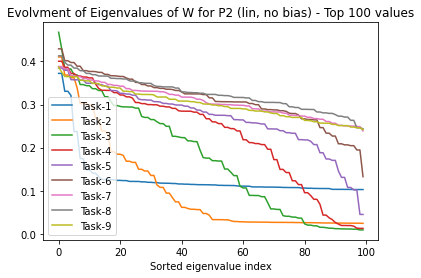

In [91]:
N = 100

for i in range(0, 9):
    w, v = LA.eig(p2_over_tasks[i].numpy())
    plt.plot(np.arange(N), sorted([v1.real for v1 in w])[::-1][:N], label=f'Task-{i+1}')

plt.title(f'Evolvment of Eigenvalues of W for P2 (lin, no bias) - Top {N} values')
plt.xlabel('Sorted eigenvalue index')
plt.legend()

In [87]:
w, v = LA.eig(p2_over_tasks[8].numpy())
sorted([v1.real for v1 in w])[::-1][:20]

[0.387274,
 0.37502038,
 0.36511222,
 0.36495537,
 0.36495537,
 0.36472282,
 0.36472282,
 0.35626397,
 0.35626397,
 0.35496226,
 0.35496226,
 0.34919012,
 0.34919012,
 0.34865248,
 0.3434707,
 0.3434707,
 0.34044334,
 0.34044334,
 0.33997068,
 0.3383875]

[0.387274,
 0.37502038,
 0.36511222,
 0.36495537,
 0.36495537,
 0.36472282,
 0.36472282,
 0.35626397,
 0.35626397,
 0.35496226,
 0.35496226,
 0.34919012,
 0.34919012,
 0.34865248,
 0.3434707,
 0.3434707,
 0.34044334,
 0.34044334,
 0.33997068,
 0.3383875,
 0.3383875,
 0.33112094,
 0.33112094,
 0.3301824,
 0.3301824,
 0.3243792,
 0.3243792,
 0.3235128,
 0.3235128,
 0.32338464,
 0.32338464,
 0.32228222,
 0.3175753,
 0.3175753,
 0.31757274,
 0.31757274,
 0.31238866,
 0.3122404,
 0.3122404,
 0.30812675,
 0.30812675,
 0.30803403,
 0.30803403,
 0.30669928,
 0.30669928,
 0.30483997,
 0.30483997,
 0.30154666,
 0.30108875,
 0.30108875,
 0.29900157,
 0.29900157,
 0.2974051,
 0.2974051,
 0.2953444,
 0.2953444,
 0.29107738,
 0.29107738,
 0.29105097,
 0.29105097,
 0.28988808,
 0.28988808,
 0.2865141,
 0.2865141,
 0.28496274,
 0.28496274,
 0.28493842,
 0.2829414,
 0.2829414,
 0.28049743,
 0.27929696,
 0.27929696,
 0.2742368,
 0.2742368,
 0.27191702,
 0.27191702,
 0.27018917,
 0.27018917,
 0.2701641,


In [73]:
import numpy as np
import matplotlib.pyplot as plt

def plot_points(matrix, ls='--', lw=1.2, colors=None):
  """
    Plots a 2xn matrix where 1st row are the x-coordinates 
    and 2nd row are the y-coordinates.
    
    Parameters:
    matrix - 2xn matrix
    ls - matplotlib linestyle
    lw - matplotlib linewidth
    colors - 1D array of colours (http://matplotlib.org/examples/color/named_colors.html)
  """

  x_points, y_points = matrix
  size = len(x_points)
  colors = ['red', 'blue', 'orange', 'green'] if not None else colors
  for i in range(size):
    plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
    plt.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color=colors[i], linestyle=ls, linewidth=lw)
    
def plot_point_label(prefix, point, location):
  """
    Plots a (x, y) point as a label
    
    Parameters:
    prefix - The name given to the point. E.g. 'p1'
    point - 1D array of [x, y]
    location - tuple coordinates of the label
  """
  
  plt.annotate('{0}={1}'.format(prefix, tuple(map(lambda x: round(x, 2), point))), 
  xy=point, xytext=location, textcoords='data', color='white', weight='semibold',
  bbox=dict(fc='navy', alpha=0.6, ec='none'), arrowprops=dict(arrowstyle='->'))


A = np.matrix([[1, 0.3], [0.45, 1.2]])
transformed_matrix = A * matrix

plot_points(matrix)
plot_points(transformed_matrix.A, '-', lw=3.0)
evals, evecs = np.linalg.eig(A)

x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()
m1 = y_v1/x_v1  # Gradient of 1st eigenvector
m2 = y_v2/x_v2  # Gradient of 2nd eigenvector

p1 = [-10/m1, -10]  # 1st point at y = -10
p2 = [20/m2, 20]    # 2nd point at y = -20
trans_p1 = A*np.matrix(p1).T
trans_p2 = A*np.matrix(p2).T

# Plot eigenvectors and labels
plt.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50], color='royalblue')
plt.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50], color='crimson')
plt.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='royalblue')
plt.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='crimson')

# Plot the points where the eigenvector line and original points intersect
plt.plot(p1[0], p1[1], 'ko')
plt.plot(p2[0], p2[1], 'ko')

# Plot the transformed points that lie on the eigenvector line
plt.plot(trans_p1[0,0], trans_p1[1,0], 'ko')
plt.plot(trans_p2[0,0], trans_p2[1,0], 'ko')

# Plot the point labels
plot_point_label('p1', p1, (12, -19))
plot_point_label('T(p1)', trans_p1.A1, (18, -13))
plot_point_label('p2', p2, (-14, 26))
plot_point_label('T(p2)', trans_p2.A1, (-6, 33))

# Set the axes
ax = plt.axes() 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')

# Limit the plot
plt.xlim([-20, 30])
plt.ylim([-20, 35])
plt.show()

NameError: name 'matrix' is not defined